In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shivamb_underwater_trash_detection_path = kagglehub.dataset_download('shivamb/underwater-trash-detection')

print('Data source import complete.')


In [ ]:
!pip install --upgrade --force-reinstall numpy==1.26.4 scipy==1.11.4 seaborn==0.12.2 matplotlib==3.8.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 92.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 54.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 109.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.2/355.2 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 99.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━

In [ ]:
!pip install opencv-python-headless numpy pandas matplotlib seaborn scikit-learn tqdm albumentations


In [ ]:
!pip install --upgrade --force-reinstall numpy==1.26.4 scipy==1.11.4 scikit-learn==1.4.2 seaborn==0.12.2 matplotlib==3.8.2


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.11.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached seaborn-0.12.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.8.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached pandas-2.3.3-cp311-cp311-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached contourpy-1.3.3-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached pillow-11.3.0-cp311-cp311-manylinux_2_27_x

In [ ]:
import numpy, scipy, sklearn, seaborn, matplotlib
print("✅ Versions:")
print("numpy:", numpy.__version__)
print("scipy:", scipy.__version__)
print("sklearn:", sklearn.__version__)
print("seaborn:", seaborn.__version__)
print("matplotlib:", matplotlib.__version__)


✅ Versions:
numpy: 1.26.4
scipy: 1.15.3
sklearn: 1.2.2
seaborn: 0.12.2
matplotlib: 3.7.2


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import albumentations as A


In [ ]:
train_path = "/kaggle/input/underwater-trash-detection/train"
val_path = "/kaggle/input/underwater-trash-detection/val/"
test_path = "/kaggle/input/underwater-trash-detection/test/"
output_csv = "/kaggle/working/features.csv"

os.makedirs("/kaggle/working", exist_ok=True)


In [ ]:
# Albumentations augmentation pipeline
augmentor = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussNoise(p=0.3),
    A.Rotate(limit=15, p=0.5)
])

def preprocess_image(image_path, target_size=(128,128)):
    # Read image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize
    img_resized = cv2.resize(img, target_size)

    # Denoise (using fastNlMeansDenoisingColored)
    img_denoised = cv2.fastNlMeansDenoisingColored(img_resized, None, 10, 10, 7, 21)

    # Contrast enhancement using CLAHE
    lab = cv2.cvtColor(img_denoised, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl,a,b))
    img_contrast = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)

    # Normalization
    img_norm = img_contrast / 255.0

    # Augmentation
    augmented = augmentor(image=np.uint8(img_norm*255))
    img_aug = augmented['image']

    return img, img_aug, img_norm



🔹 Class: val


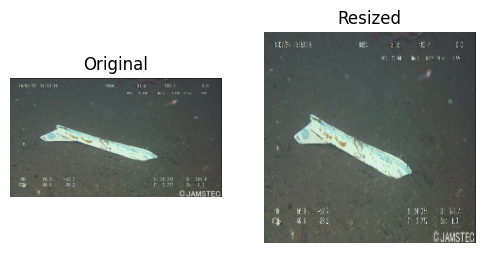

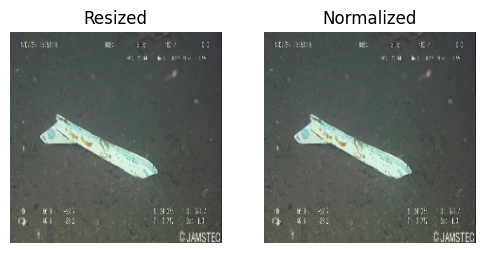

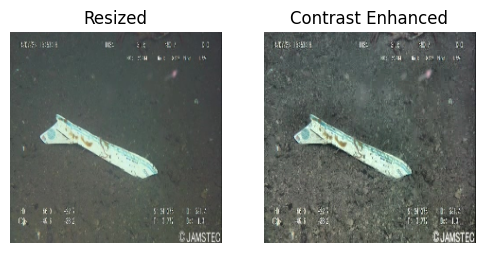

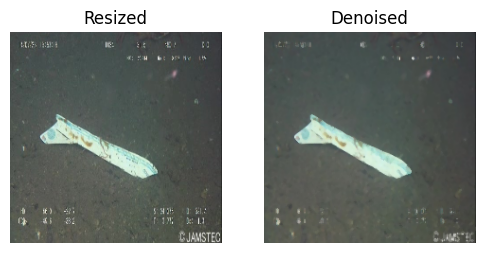

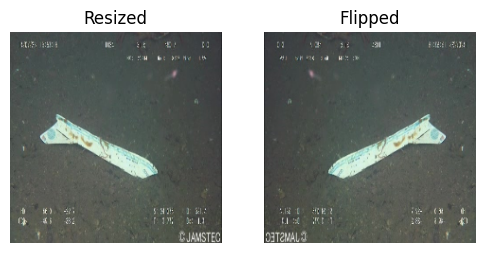

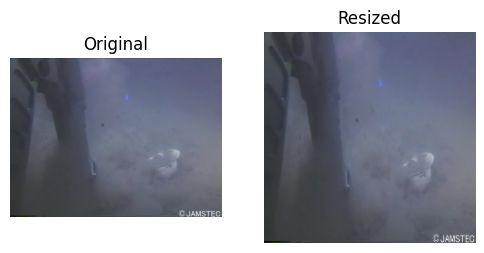

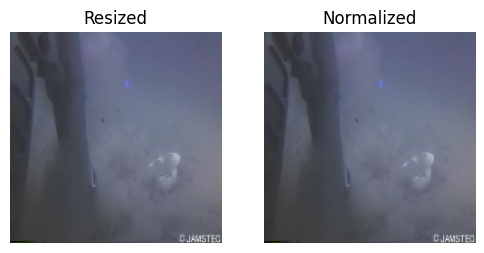

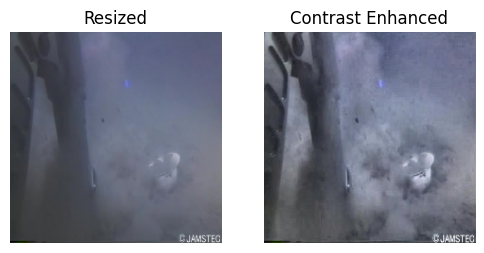

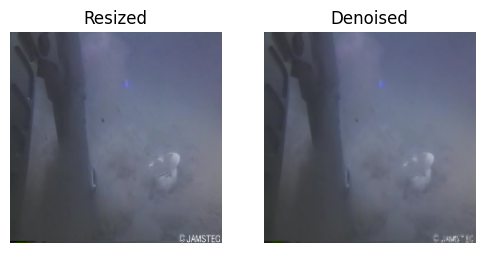

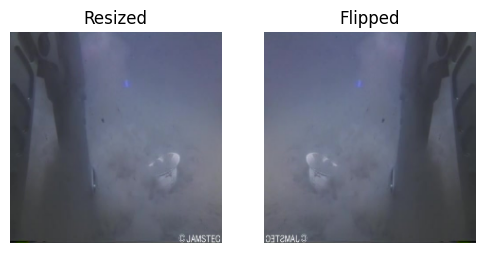


🔹 Class: test


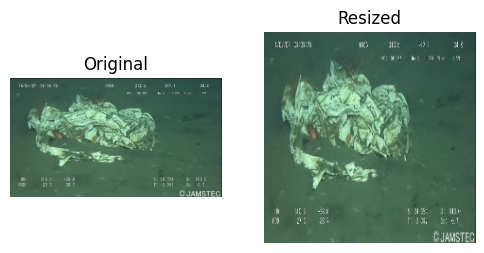

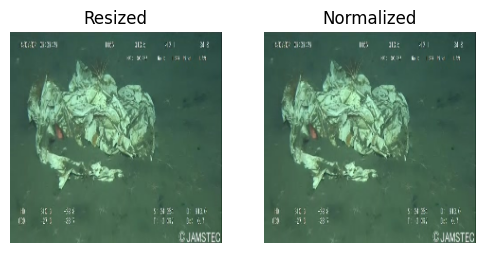

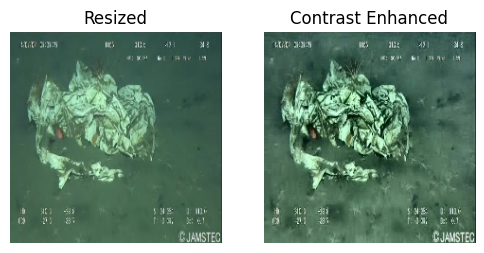

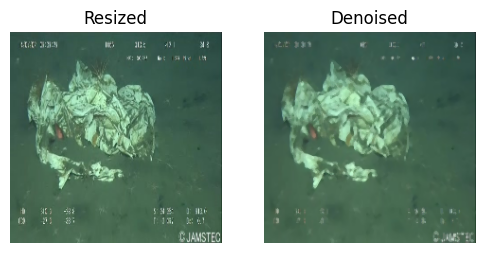

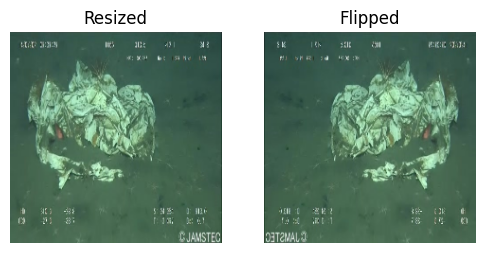

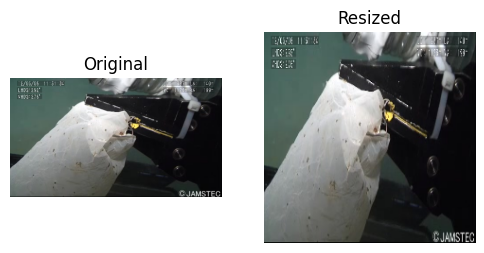

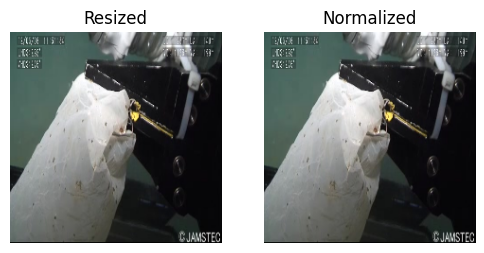

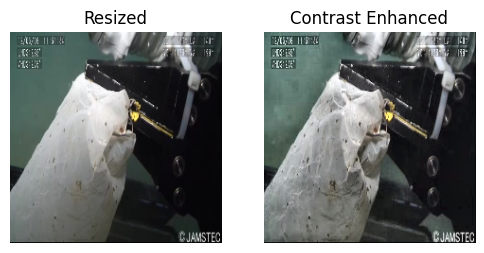

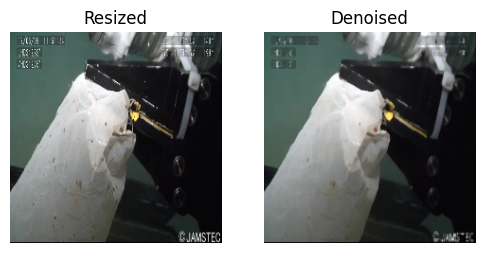

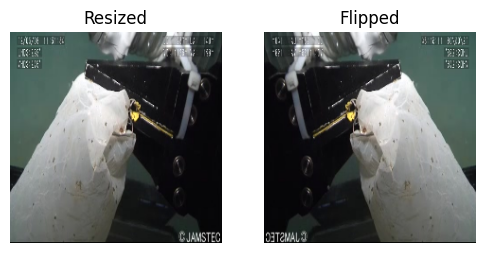


🔹 Class: train


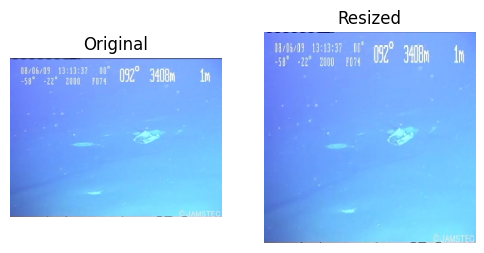

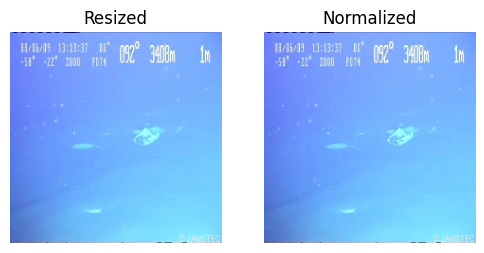

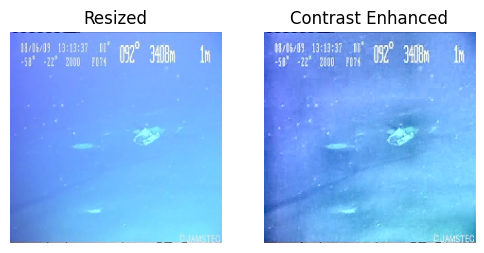

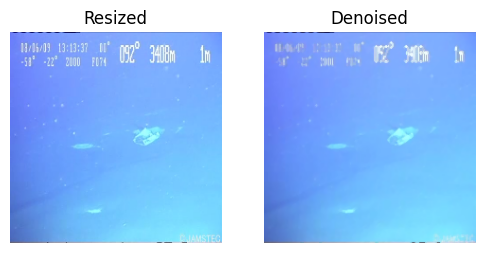

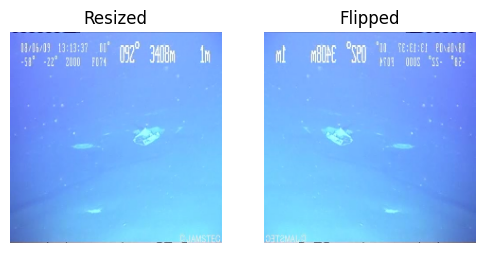

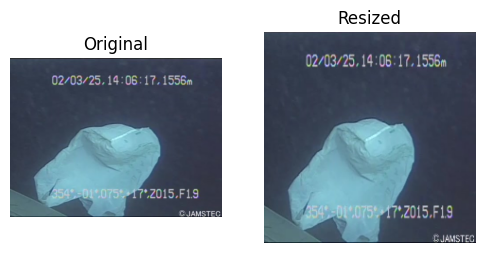

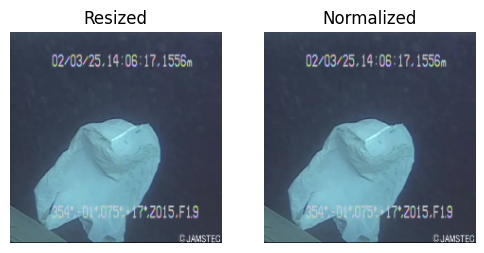

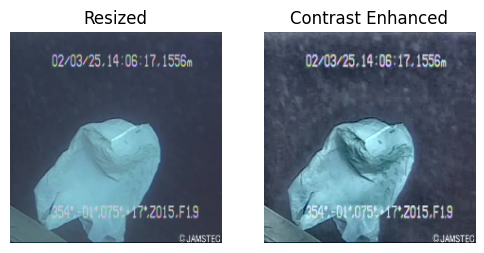

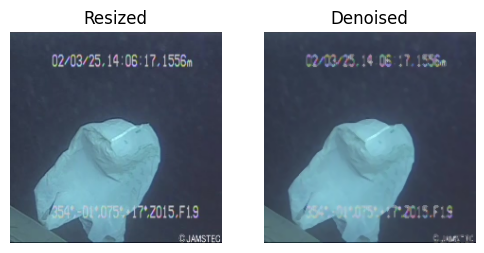

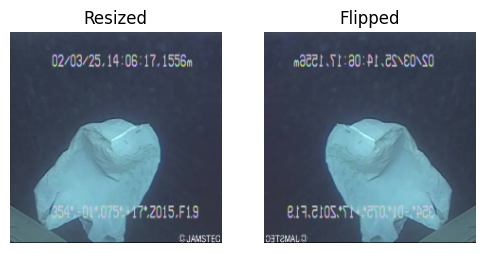

In [ ]:
# Ensure inline plotting
%matplotlib inline

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

DATASET_DIR = "/kaggle/input/underwater-trash-detection"  # your uploaded dataset folder
IMG_SIZE = (224, 224)
SAMPLE_COUNT = 2

# ----------------------------
# Preprocessing functions
# ----------------------------
def resize_image(img, size=IMG_SIZE):
    return cv2.resize(img, size)

def normalize_image(img):
    return img.astype(np.float32) / 255.0

def enhance_contrast(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    merged = cv2.merge((cl, a, b))
    return cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)

def remove_noise(img):
    return cv2.medianBlur(img, 3)

def augment_image(img):
    return cv2.flip(img, 1)

# ----------------------------
# Visualization function
# ----------------------------
def show_before_after(before, after, title_before, title_after):
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(before, cv2.COLOR_BGR2RGB))
    plt.title(title_before)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    after_disp = (after * 255).astype(np.uint8) if after.dtype != np.uint8 else after
    plt.imshow(cv2.cvtColor(after_disp, cv2.COLOR_BGR2RGB))
    plt.title(title_after)
    plt.axis("off")

    plt.show()  # ensures output shows in Kaggle

# ----------------------------
# Load sample images
# ----------------------------
def get_sample_images(dataset_dir, count=SAMPLE_COUNT):
    class_samples = {}
    for class_name in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_name)
        if not os.path.isdir(class_path):
            continue
        image_files = [
            os.path.join(class_path, f)
            for f in os.listdir(class_path)
            if f.lower().endswith((".jpg", ".jpeg", ".png"))
        ]
        if image_files:
            class_samples[class_name] = random.sample(image_files, min(count, len(image_files)))
    return class_samples

# ----------------------------
# Main pipeline
# ----------------------------
sample_dict = get_sample_images(DATASET_DIR)

for class_name, sample_paths in sample_dict.items():
    print(f"\n🔹 Class: {class_name}")
    for img_path in sample_paths:
        img = cv2.imread(img_path)
        if img is None:
            print(f"⚠️ Could not read {img_path}")
            continue

        resized = resize_image(img)
        normalized = normalize_image(resized)
        contrast = enhance_contrast(resized)
        denoised = remove_noise(resized)
        augmented = augment_image(resized)

        # Visualize all steps one by one
        show_before_after(img, resized, "Original", "Resized")
        show_before_after(resized, normalized, "Resized", "Normalized")
        show_before_after(resized, contrast, "Resized", "Contrast Enhanced")
        show_before_after(resized, denoised, "Resized", "Denoised")
        show_before_after(resized, augmented, "Resized", "Flipped")


In [ ]:
def extract_features(image_path):
    _, _, img = preprocess_image(image_path)

    # Flatten for global stats
    mean_color = np.mean(img, axis=(0,1))
    std_color = np.std(img, axis=(0,1))
    brightness = np.mean(cv2.cvtColor((img*255).astype(np.uint8), cv2.COLOR_RGB2GRAY))

    # Edge features using Canny
    edges = cv2.Canny((img*255).astype(np.uint8), 100, 200)
    edge_density = np.sum(edges) / edges.size

    # Combine all into feature vector
    features = np.concatenate([mean_color, std_color, [brightness, edge_density]])
    return features


In [ ]:
features = []
labels = []

train_label_path = "/kaggle/input/underwater-trash-detection/train/labels"

for img_name in tqdm(os.listdir(train_path), desc="Extracting features"):
    img_path = os.path.join(train_path, img_name)
    label_path = os.path.join(train_label_path, img_name.replace('.jpg', '.txt'))

    # Label: 1 if trash present, else 0
    label = 1 if os.path.exists(label_path) and os.path.getsize(label_path) > 0 else 0

    try:
        feat = extract_features(img_path)
        features.append(feat)
        labels.append(label)
    except:
        continue

# Convert to DataFrame and save
columns = ['mean_r','mean_g','mean_b','std_r','std_g','std_b','brightness','edge_density','label']
df = pd.DataFrame(np.column_stack([features, labels]), columns=columns)
df.to_csv(output_csv, index=False)

print(f"✅ Features saved to {output_csv}")
df.head()


Extracting features: 100%|██████████| 17160/17160 [07:45<00:00, 36.85it/s]

✅ Features saved to /kaggle/working/features.csv


mean_r    mean_g    mean_b     std_r     std_g     std_b  brightness  \
0  0.547167  0.691540  0.712121  0.089993  0.104554  0.111999  165.943787   
1  0.375598  0.486532  0.746889  0.077705  0.085014  0.141063  123.170471   
2  0.432716  0.583760  0.612368  0.084566  0.108394  0.104868  138.195801   
3  0.549996  0.732886  0.746355  0.101522  0.108280  0.135105  173.364929   
4  0.192602  0.190981  0.218596  0.147057  0.145159  0.163070   49.612122   

   edge_density  label  
0      6.085510    0.0  
1      4.031067    0.0  
2      4.731445    0.0  
3      4.731445    0.0  
4      8.809204    0.0

In [ ]:
import os

dataset_path = "/kaggle/input/underwater-trash-detection"

for folder in ["train", "val", "test"]:
    path = os.path.join(dataset_path, folder)
    print(f"\n📁 {folder.upper()} folder contents:")
    print(os.listdir(path)[:10])  # show first few files

    label_dir = os.path.join(path, "labels")
    image_dir = os.path.join(path, "images")

    if os.path.exists(label_dir):
        print(f"✅ Label folder found: {label_dir}")
        label_files = [f for f in os.listdir(label_dir) if f.endswith(".txt")]
        print(f"🔹 {len(label_files)} label files found. Example:")
        print(label_files[:5])
    else:
        print("❌ No labels folder found.")

    if os.path.exists(image_dir):
        print(f"🖼️ Image folder found: {image_dir}")
        image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]
        print(f"🖼️ {len(image_files)} image files found. Example:")
        print(image_files[:5])
    else:
        print("⚠️ No separate 'images' folder; images may be directly inside train/")



📁 TRAIN folder contents:
['bio0012_frame0000359.xml', 'obj0348_frame0000123.jpg', 'obj0313_frame0000036.jpg', 'bio0004_frame0000193.xml', 'obj0309_frame0000053.jpg', 'obj1284_frame0000090.xml', 'obj0332_frame0000068.xml', 'obj1657_frame0000080.txt', 'obj1042_frame0000161.txt', 'obj0305_frame0000050.jpg']
❌ No labels folder found.
⚠️ No separate 'images' folder; images may be directly inside train/

📁 VAL folder contents:
['obj1607_frame0000200.jpg', 'obj1344_frame0000172.xml', 'obj0078_frame0000039.xml', 'obj1323_frame0000116.txt', 'obj1314_frame0000306.jpg', 'obj1618_frame0000068.jpg', 'obj1302_frame0000088.jpg', 'obj1344_frame0000153.xml', 'obj1344_frame0000201.txt', 'obj1302_frame0000653.jpg']
❌ No labels folder found.
⚠️ No separate 'images' folder; images may be directly inside train/

📁 TEST folder contents:
['obj0333_frame0000107.xml', 'bio0002_frame0000226.jpg', 'obj0228_frame0000015.xml', 'obj1505_frame0000120.xml', 'obj0312_frame0000033.txt', 'bio0002_frame0000465.txt', 'obj

In [ ]:
import xml.etree.ElementTree as ET
import os

train_path = "/kaggle/input/underwater-trash-detection/train"

# Check one XML
for f in os.listdir(train_path):
    if f.endswith('.xml'):
        xml_file = os.path.join(train_path, f)
        print("🔍 Checking:", xml_file)
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            print("Label:", obj.find('name').text)
        break

# Check one TXT
for f in os.listdir(train_path):
    if f.endswith('.txt'):
        txt_file = os.path.join(train_path, f)
        print("\n🔍 Checking:", txt_file)
        with open(txt_file) as f:
            print(f.read())
        break


🔍 Checking: /kaggle/input/underwater-trash-detection/train/bio0012_frame0000359.xml
Label: bio

🔍 Checking: /kaggle/input/underwater-trash-detection/train/obj1657_frame0000080.txt
2 0.422916666667 0.762962962963 0.445833333333 0.466666666667
0 0.363541666667 0.501851851852 0.227083333333 0.285185185185



In [ ]:
!pip install ultralytics --upgrade

import os
import shutil
import xml.etree.ElementTree as ET
from pathlib import Path

# Original dataset path
dataset_path = "/kaggle/input/underwater-trash-detection"

# Working folder in Kaggle where we organize files
work_path = "/kaggle/working/underwater_trash"
os.makedirs(work_path, exist_ok=True)

# Create folders for YOLOv8
for folder in ["images/train", "images/val", "labels/train", "labels/val"]:
    os.makedirs(os.path.join(work_path, folder), exist_ok=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.2.22
    Uninstalling ultralytics-8.2.22:
      Successfully uninstalled ultralytics-8.2.22


In [ ]:
classes = set()

for split in ["train", "val"]:
    split_path = os.path.join(dataset_path, split)
    for f in os.listdir(split_path):
        if f.endswith(".xml"):
            tree = ET.parse(os.path.join(split_path, f))
            root = tree.getroot()
            for obj in root.findall("object"):
                classes.add(obj.find("name").text)

classes = sorted(list(classes))
print("Detected classes:", classes)


Detected classes: ['bio', 'cloth', 'fishing', 'metal', 'paper', 'papper', 'plastic', 'rov', 'rubber', 'timestamp', 'unknown', 'wood']


In [ ]:
def convert_and_copy(split):
    split_path = os.path.join(dataset_path, split)
    for f in os.listdir(split_path):
        file_path = os.path.join(split_path, f)

        # Copy image to working folder
        if f.endswith((".jpg", ".png")):
            shutil.copy(file_path, os.path.join(work_path, f"images/{split}/{f}"))

        # Convert XML to YOLO TXT
        if f.endswith(".xml"):
            tree = ET.parse(file_path)
            root = tree.getroot()

            img_file = root.find("filename").text
            img_path = os.path.join(split_path, img_file)
            from cv2 import imread
            img = imread(img_path)
            h, w, _ = img.shape

            txt_file = os.path.splitext(img_file)[0] + ".txt"
            txt_path = os.path.join(work_path, f"labels/{split}/{txt_file}")

            with open(txt_path, "w") as out_file:
                for obj in root.findall("object"):
                    class_name = obj.find("name").text
                    class_id = classes.index(class_name)
                    bndbox = obj.find("bndbox")
                    xmin = int(bndbox.find("xmin").text)
                    ymin = int(bndbox.find("ymin").text)
                    xmax = int(bndbox.find("xmax").text)
                    ymax = int(bndbox.find("ymax").text)

                    x_center = (xmin + xmax) / 2 / w
                    y_center = (ymin + ymax) / 2 / h
                    width = (xmax - xmin) / w
                    height = (ymax - ymin) / h

                    out_file.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

# Run for train and val
convert_and_copy("train")
convert_and_copy("val")


In [ ]:
yaml_path = os.path.join(work_path, "data.yaml")
with open(yaml_path, "w") as f:
    f.write(f"train: {work_path}/images/train\n")
    f.write(f"val: {work_path}/images/val\n")
    f.write(f"nc: {len(classes)}\n")
    f.write(f"names: {classes}\n")

print("data.yaml created at:", yaml_path)


data.yaml created at: /kaggle/working/underwater_trash/data.yaml


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # or yolov8s.pt for small, yolov8m.pt for medium

model.train(
    data=yaml_path,
    epochs=15,
    imgsz=640,
    batch=16,
    project="/kaggle/working/UnderwaterTrashDetection",
    name="yolov8_trash",
    exist_ok=True
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.214 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/underwater_trash/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like


                   all        820       3052      0.447        0.4      0.413      0.266
                   bio         54         70     0.0445     0.0714     0.0529     0.0199
                 metal         12         24          0          0   0.000964   0.000675
               plastic        819        853      0.789       0.76      0.823      0.555
                   rov        141        141      0.567      0.546      0.465      0.291
             timestamp        809       1964      0.833      0.624      0.723      0.466
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /kaggle/working/UnderwaterTrashDetection/yolov8_trash


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 3, 6, 7, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7963fe90fa90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

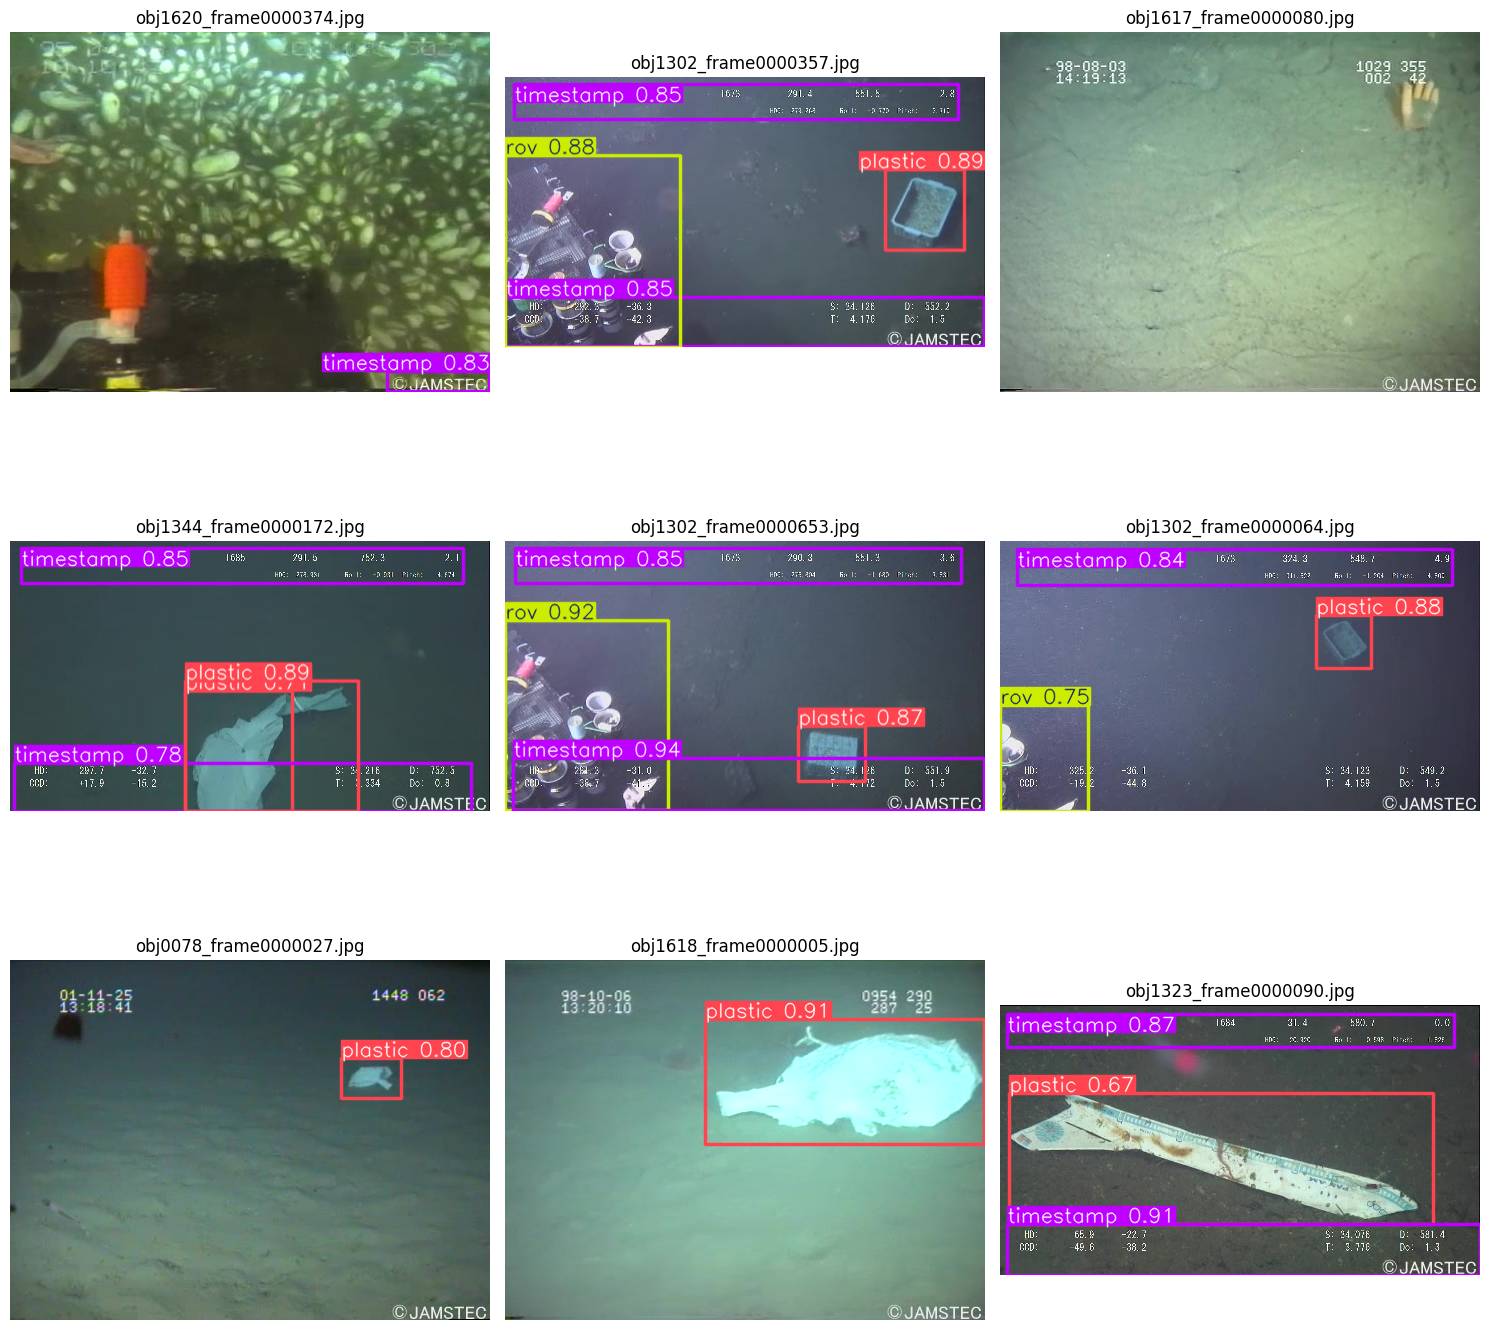

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# --- Load Trained YOLOv8 Model ---
model_path = "/kaggle/working/UnderwaterTrashDetection/yolov8_trash/weights/best.pt"
model = YOLO(model_path)

# --- Select 9 Random Validation Images ---
val_images_path = "/kaggle/working/underwater_trash/images/val"
images = [os.path.join(val_images_path, f) for f in os.listdir(val_images_path) if f.endswith(('.jpg', '.png'))]
sample_images = random.sample(images, 9)

# --- Plot 9 Images with Predictions ---
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for idx, img_path in enumerate(sample_images):
    results = model.predict(img_path, conf=0.25, verbose=False)
    result_img = results[0].plot()  # Image with bounding boxes
    result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

    axes[idx].imshow(result_img)
    axes[idx].axis('off')
    axes[idx].set_title(os.path.basename(img_path))

plt.tight_layout()
plt.show()


In [ ]:
from ultralytics import YOLO

# --- Load Trained Model ---
model_path = "/kaggle/working/UnderwaterTrashDetection/yolov8_trash/weights/best.pt"
model = YOLO(model_path)

# --- Evaluate on Validation Set ---
metrics = model.val()  # DetMetrics object

# --- Get mean results (returns 4 values: precision, recall, mAP50, mAP50-95) ---
precision, recall, mAP50, mAP50_95 = metrics.mean_results()

# --- Compute F1-score manually ---
if precision + recall > 0:
    f1_score = 2 * (precision * recall) / (precision + recall)
else:
    f1_score = 0.0

# --- Print ---
print("\n✅ Overall Evaluation Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"mAP50:     {mAP50:.4f}")
print(f"mAP50-95:  {mAP50_95:.4f}")
print(f"F1-score:  {f1_score:.4f}")


Ultralytics 8.3.214 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,988 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 833.2±366.1 MB/s, size: 20.5 KB)
val: Scanning /kaggle/working/underwater_trash/labels/val.cache... 820 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 820/820 1.6Mit/s 0.0s0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 52/52 8.7it/s 6.0s<0.1s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  X : float or int or array-like


                   all        820       3052      0.447        0.4      0.413      0.266
                   bio         54         70     0.0445     0.0714      0.053       0.02
                 metal         12         24          0          0   0.000955   0.000668
               plastic        819        853      0.791       0.76      0.822      0.553
                   rov        141        141      0.566      0.546      0.466      0.291
             timestamp        809       1964      0.834      0.622      0.722      0.465
Speed: 0.4ms preprocess, 2.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /kaggle/working/runs/detect/val3

✅ Overall Evaluation Metrics:
Precision: 0.4473
Recall:    0.4000
mAP50:     0.4128
mAP50-95:  0.2659
F1-score:  0.4223


In [ ]:
metrics.summary()

[{'Class': 'bio',
  'Images': 54,
  'Instances': 70,
  'Box-P': 0.04454,
  'Box-R': 0.07143,
  'Box-F1': 0.05487,
  'mAP50': 0.05298,
  'mAP50-95': 0.01997},
 {'Class': 'metal',
  'Images': 12,
  'Instances': 24,
  'Box-P': 0.0,
  'Box-R': 0.0,
  'Box-F1': 0.0,
  'mAP50': 0.00095,
  'mAP50-95': 0.00067},
 {'Class': 'plastic',
  'Images': 819,
  'Instances': 853,
  'Box-P': 0.79129,
  'Box-R': 0.76003,
  'Box-F1': 0.77534,
  'mAP50': 0.82171,
  'mAP50-95': 0.55259},
 {'Class': 'rov',
  'Images': 141,
  'Instances': 141,
  'Box-P': 0.56644,
  'Box-R': 0.5461,
  'Box-F1': 0.55608,
  'mAP50': 0.46605,
  'mAP50-95': 0.29139},
 {'Class': 'timestamp',
  'Images': 809,
  'Instances': 1964,
  'Box-P': 0.83417,
  'Box-R': 0.6224,
  'Box-F1': 0.71289,
  'mAP50': 0.72211,
  'mAP50-95': 0.46513}]

In [ ]:
# ## Interactive YOLOv8 Detection UI

import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import display
import ipywidgets as widgets
from PIL import Image

# --- Load your trained YOLOv8 model ---
model_path = "/kaggle/working/UnderwaterTrashDetection/yolov8_trash/weights/best.pt"
model = YOLO(model_path)

# --- File upload widget ---
upload_widget = widgets.FileUpload(
    accept='.jpg,.png',  # accept only images
    multiple=False,
    description='Upload Image'
)

# --- Detection function ---
def detect_and_show(change):
    if len(upload_widget.value) == 0:
        return

    # Get uploaded image
    uploaded_file = list(upload_widget.value.values())[0]
    img_bytes = uploaded_file['content']

    # Save temporarily
    img_path = "/kaggle/working/temp_input.jpg"
    with open(img_path, 'wb') as f:
        f.write(img_bytes)

    # Run YOLOv8 detection
    results = model.predict(img_path, conf=0.25, verbose=False)
    result_img = results[0].plot()

    # Convert BGR -> RGB for Matplotlib
    result_img = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

    # Display image
    plt.figure(figsize=(8, 6))
    plt.imshow(result_img)
    plt.axis('off')
    plt.title("YOLOv8 Trash Detection")
    plt.show()

# --- Link widget to detection ---
upload_widget.observe(detect_and_show, names='value')

display(upload_widget)
